
#Installation
---



In [1]:
from pathlib import Path
import os
from datetime import date
import re
import glob

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import dask.dataframe as dd
pd.options.mode.chained_assignment = None

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
# Paths
p = Path.cwd()
pathShapefile = p / 'shapefile'
pathParquets = Path('/Users/alex/Dropbox/FFE/output')

print(len(os.listdir(pathParquets)))

2333


In [14]:
def read_and_concatenate_parquets(path=pathParquets):
    L = []
    files = pathParquets.glob('*scenario*')
    for file in files:
        print(f'{file} loaded file \n {len(L)}/2999')
        pqt = dd.read_parquet(file, engine='pyarrow')
        L.append(pqt)
    df = dd.concat(L)
    return df

    
def count_fid_occurences(df):
#     df.sort_values(by=['scenario'], inplace=True)
#     df.drop_duplicates(subset =['scenario', 'source'], inplace = True) 
    count_df = df['source'].value_counts().compute()
#     count_df.sort_values(by='scenario', inplace=True)
    count_df = pd.DataFrame({'source': count_df.index, 'count': count_df.values})
#     count_df.sort_values(['count'], ascending=False, inplace=True)
    count_df.to_parquet(str(pathShapefile) + '/' + f'CountBurn-{str(date.today())}.parquet', 
                        engine='auto', compression="GZIP")# could be datetime.now
    return count_df


def Merge(countDf,nameShapefile):
    gdfShape = gpd.read_file(pathShapefile / nameShapefile)
    gdfShape.insert(0, 'FID', range(0, len(gdfShape)))
#     gdfShape.rename(columns={'FID': 'source'}, inplace=True)
#     gdfShape = gdfShape[['source', 'geometry']]
    countDf.index.name = None
    merged = countDf.merge(gdfShape, on='source', how='inner')
    return merged


def createShapefile(df):
    gdf = gpd.GeoDataFrame(df, geometry='geometry')
    gdf.to_file(os.path.join(str(pathShapefile) + "/" + "BurnscenarioWellington.shp"))
    return gdf

In [15]:
%%time
concatDf = read_and_concatenate_parquets()

/Users/alex/Dropbox/FFE/output/scenario2931_2020-08-06.parquet loaded file 
 0/2999
/Users/alex/Dropbox/FFE/output/scenario352_2020-08-06.parquet loaded file 
 1/2999
/Users/alex/Dropbox/FFE/output/scenario2108_2020-08-06.parquet loaded file 
 2/2999
/Users/alex/Dropbox/FFE/output/scenario2999_2020-08-06.parquet loaded file 
 3/2999
/Users/alex/Dropbox/FFE/output/scenario1577_2020-08-06.parquet loaded file 
 4/2999
/Users/alex/Dropbox/FFE/output/scenario2662_2020-08-06.parquet loaded file 
 5/2999
/Users/alex/Dropbox/FFE/output/scenario180_2020-08-06.parquet loaded file 
 6/2999
/Users/alex/Dropbox/FFE/output/scenario2418_2020-08-06.parquet loaded file 
 7/2999
/Users/alex/Dropbox/FFE/output/scenario2372_2020-08-06.parquet loaded file 
 8/2999
/Users/alex/Dropbox/FFE/output/scenario128_2020-08-06.parquet loaded file 
 9/2999
/Users/alex/Dropbox/FFE/output/scenario1067_2020-08-06.parquet loaded file 
 10/2999
/Users/alex/Dropbox/FFE/output/scenario1895_2020-08-06.parquet loaded file 
 1

/Users/alex/Dropbox/FFE/output/scenario1014_2020-08-06.parquet loaded file 
 97/2999
/Users/alex/Dropbox/FFE/output/scenario1885_2020-08-06.parquet loaded file 
 98/2999
/Users/alex/Dropbox/FFE/output/scenario389_2020-08-06.parquet loaded file 
 99/2999
/Users/alex/Dropbox/FFE/output/scenario1504_2020-08-06.parquet loaded file 
 100/2999
/Users/alex/Dropbox/FFE/output/scenario2611_2020-08-06.parquet loaded file 
 101/2999
/Users/alex/Dropbox/FFE/output/scenario321_2020-08-06.parquet loaded file 
 102/2999
/Users/alex/Dropbox/FFE/output/scenario2942_2020-08-06.parquet loaded file 
 103/2999
/Users/alex/Dropbox/FFE/output/scenario1567_2020-08-06.parquet loaded file 
 104/2999
/Users/alex/Dropbox/FFE/output/scenario2672_2020-08-06.parquet loaded file 
 105/2999
/Users/alex/Dropbox/FFE/output/scenario2989_2020-08-06.parquet loaded file 
 106/2999
/Users/alex/Dropbox/FFE/output/scenario2921_2020-08-06.parquet loaded file 
 107/2999
/Users/alex/Dropbox/FFE/output/scenario342_2020-08-06.parqu

/Users/alex/Dropbox/FFE/output/scenario1873_2020-08-06.parquet loaded file 
 193/2999
/Users/alex/Dropbox/FFE/output/scenario1788_2020-08-06.parquet loaded file 
 194/2999
/Users/alex/Dropbox/FFE/output/scenario2435_2020-08-06.parquet loaded file 
 195/2999
/Users/alex/Dropbox/FFE/output/scenario1720_2020-08-06.parquet loaded file 
 196/2999
/Users/alex/Dropbox/FFE/output/scenario1810_2020-08-06.parquet loaded file 
 197/2999
/Users/alex/Dropbox/FFE/output/scenario166_2020-08-06.parquet loaded file 
 198/2999
/Users/alex/Dropbox/FFE/output/scenario1029_2020-08-06.parquet loaded file 
 199/2999
/Users/alex/Dropbox/FFE/output/scenario2456_2020-08-06.parquet loaded file 
 200/2999
/Users/alex/Dropbox/FFE/output/scenario1743_2020-08-06.parquet loaded file 
 201/2999
/Users/alex/Dropbox/FFE/output/scenario1081_2020-08-06.parquet loaded file 
 202/2999
/Users/alex/Dropbox/FFE/output/scenario2394_2020-08-06.parquet loaded file 
 203/2999
/Users/alex/Dropbox/FFE/output/scenario1539_2020-08-06.

/Users/alex/Dropbox/FFE/output/scenario176_2020-08-06.parquet loaded file 
 289/2999
/Users/alex/Dropbox/FFE/output/scenario1039_2020-08-06.parquet loaded file 
 290/2999
/Users/alex/Dropbox/FFE/output/scenario1243_2020-08-06.parquet loaded file 
 291/2999
/Users/alex/Dropbox/FFE/output/scenario2156_2020-08-06.parquet loaded file 
 292/2999
/Users/alex/Dropbox/FFE/output/scenario2694_2020-08-06.parquet loaded file 
 293/2999
/Users/alex/Dropbox/FFE/output/scenario1581_2020-08-06.parquet loaded file 
 294/2999
/Users/alex/Dropbox/FFE/output/scenario1529_2020-08-06.parquet loaded file 
 295/2999
/Users/alex/Dropbox/FFE/output/scenario1220_2020-08-06.parquet loaded file 
 296/2999
/Users/alex/Dropbox/FFE/output/scenario2135_2020-08-06.parquet loaded file 
 297/2999
/Users/alex/Dropbox/FFE/output/scenario1288_2020-08-06.parquet loaded file 
 298/2999
/Users/alex/Dropbox/FFE/output/scenario2425_2020-08-06.parquet loaded file 
 299/2999
/Users/alex/Dropbox/FFE/output/scenario1730_2020-08-06.

/Users/alex/Dropbox/FFE/output/scenario2264_2020-08-06.parquet loaded file 
 385/2999
/Users/alex/Dropbox/FFE/output/scenario1171_2020-08-06.parquet loaded file 
 386/2999
/Users/alex/Dropbox/FFE/output/scenario34_2020-08-06.parquet loaded file 
 387/2999
/Users/alex/Dropbox/FFE/output/scenario1461_2020-08-06.parquet loaded file 
 388/2999
/Users/alex/Dropbox/FFE/output/scenario2774_2020-08-06.parquet loaded file 
 389/2999
/Users/alex/Dropbox/FFE/output/scenario2827_2020-08-06.parquet loaded file 
 390/2999
/Users/alex/Dropbox/FFE/output/scenario244_2020-08-06.parquet loaded file 
 391/2999
/Users/alex/Dropbox/FFE/output/scenario1926_2020-08-06.parquet loaded file 
 392/2999
/Users/alex/Dropbox/FFE/output/scenario2560_2020-08-06.parquet loaded file 
 393/2999
/Users/alex/Dropbox/FFE/output/scenario1675_2020-08-06.parquet loaded file 
 394/2999
/Users/alex/Dropbox/FFE/output/scenario282_2020-08-06.parquet loaded file 
 395/2999
/Users/alex/Dropbox/FFE/output/scenario1365_2020-08-06.par

ArrowInvalid: Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

In [55]:
%%time
countConcatDf = count_fid_occurences(concatDf)
countConcatDf['count'].max()

Wall time: 15.7 s


1109

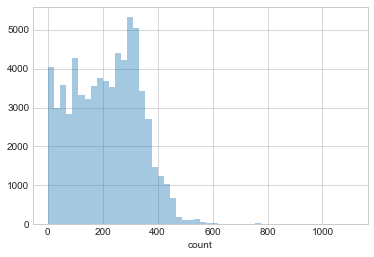

In [44]:
import seaborn as sns
sns.distplot(countConcatDf['FID'], kde=False)

In [49]:
gdfShape = gpd.read_file(pathShapefile /  'WellWHV_Buildings.shp')
# gdfShape.plot('IgnProbBld')
gdfShape.insert(0, 'FID', range(0, len(gdfShape)))
gdfShape

,FID,Replacemen,Combustibl,FloorArea,BLDG_ID,SA2_ID,NightOccup,IgnProbBld,geometry
0,0,271128.0,1,156.0,1,67,3.0,0.000040,"POLYGON ((1748253.040 5422598.875, 1748260.639..."
1,1,66044.0,1,38.0,2,75,1.0,0.000024,"POLYGON ((1752652.050 5423208.879, 1752658.230..."
2,2,56944.0,1,21.0,3,23,0.0,0.000101,"POLYGON ((1750820.799 5434554.465, 1750819.180..."
3,3,307626.0,1,177.0,4,38,3.0,0.000102,"POLYGON ((1750052.705 5432505.105, 1750056.199..."
4,4,342386.0,1,197.0,5,60,3.0,0.000081,"POLYGON ((1748074.536 5424848.405, 1748075.076..."
...,...,...,...,...,...,...,...,...,...
73730,73730,330220.0,1,190.0,73731,33,3.0,0.000090,"POLYGON ((1752362.052 5434499.195, 1752375.208..."
73731,73731,357378.0,1,132.0,73732,63,2.0,0.000060,"POLYGON ((1750067.567 5426183.099, 1750072.253..."
73732,73732,939420.0,1,340.0,73733,23,5.0,0.000101,"POLYGON ((1750235.005 5434626.103, 1750243.300..."
73733,73733,307626.0,1,177.0,73734,64,3.0,0.000288,"POLYGON ((1750454.255 5425527.410, 1750464.941..."


In [51]:
merge = countConcatDf.merge(gdfShape, on='FID')
countShape = gpd.GeoDataFrame(merge, geometry='geometry')

In [54]:
countShape['count'].max()

8263

In [52]:
# %%time
# mergedDf = Merge(countConcatDf, 'WellWHV_Buildings.shp')
# countShape = createShapefile(mergedDf)

Text(0.5, 1, 'Original burn count at meshblock level')

Text(0.5, 1, 'Network burn count at individual building level')

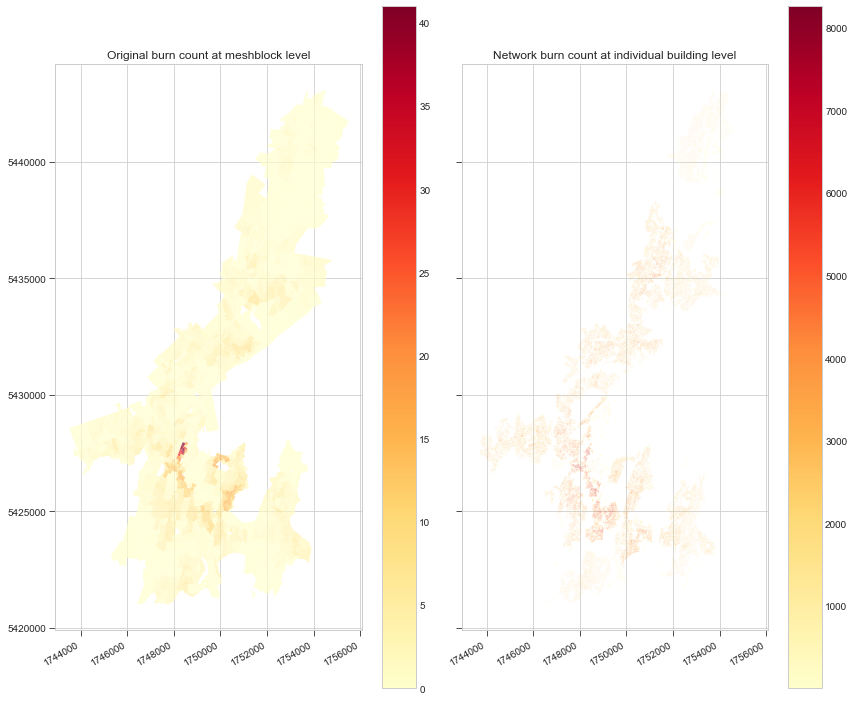

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
# import contextily as ctx
%matplotlib inline
plt.style.use('seaborn-whitegrid')

FinnMeshblockShape = gpd.read_file(pathShapefile / 'Finn_MeshBlockSummary.shp')
countShape = gpd.read_file(pathShapefile / 'Burn3000scenarioWellington.shp')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12, 10))

FinnMeshblockShape.plot(ax=ax1, column='WellWHV_Bu', cmap='YlOrRd', alpha=0.7, legend=True)
# ctx.add_basemap(ax1, crs=2193)
countShape.plot(ax=ax2, column='count', cmap='YlOrRd', alpha=0.7, legend=True)
# ctx.add_basemap(ax2, crs=2193)

ax1.set_title('Original burn count at meshblock level')
ax1.ticklabel_format(useOffset=False, style='plain')
ax2.set_title('Network burn count at individual building level')
ax2.ticklabel_format(useOffset=False, style='plain')
ax1.tick_params(direction='out', length=6)
ax2.tick_params(direction="out", length=6)

fig.autofmt_xdate()
plt.tight_layout()
plt.savefig(pathShapefile / 'ComparisonGISvsNetwork_3000Burn.png', dpi=600)
plt.show()